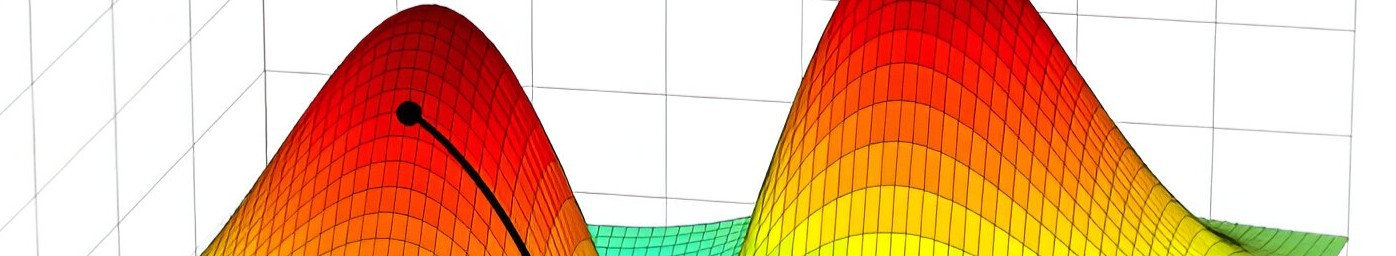

# Solución - Con Metaheurística - Caso base, proyecto A caso 2 y caso 3 

En este notebook se obtienen los resultados de la implementación de la meteheurística, y se guardan los archivos de verificación en la carpeta "resultados". Asimismo, se grafican las rutas y la evolución del algoritmo, y se discuten los mismos.

La explicación del código y su implementación se encuentra en el archivo MOS_P1_3.ipynb


 Solving caso_base...
Precomputing distances...
Distances computed.

Tiempo total: 14.10 s
Memoria inicial: 120.28 MB
Memoria final:   120.43 MB
Total Cost (fitness): 725,381.60

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_base.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [12, 21, 7, 19, 2, 18, 13]
  Distancia: 48.95 km | Tiempo: 2.15 h | Combustible: 26593 COP | Fijo: 50000 COP
  Costo total: 215,328.66 COP

Vehículo 2 | Ruta: [8, 5, 17, 24, 11, 9]
  Distancia: 45.59 km | Tiempo: 2.01 h | Combustible: 24768 COP | Fijo: 50000 COP
  Costo total: 203,980.17 COP

Vehículo 3 | Ruta: [6, 22, 1, 4, 10, 16, 15, 3]
  Distancia: 50.83 km | Tiempo: 2.24 h | Combustible: 27616 COP | Fijo: 50000 COP
  Costo total: 221,685.38 COP

Vehículo 4 | Ruta: [20, 23, 14]
  Distancia: 10.18 km | Tiempo: 0.45 h | Combustible: 5531 COP | Fijo: 50000 COP
  Costo total: 84,387.39 COP

Costo total de todas las rutas: 725,381.60 COP


C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\1635366052.py:490: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


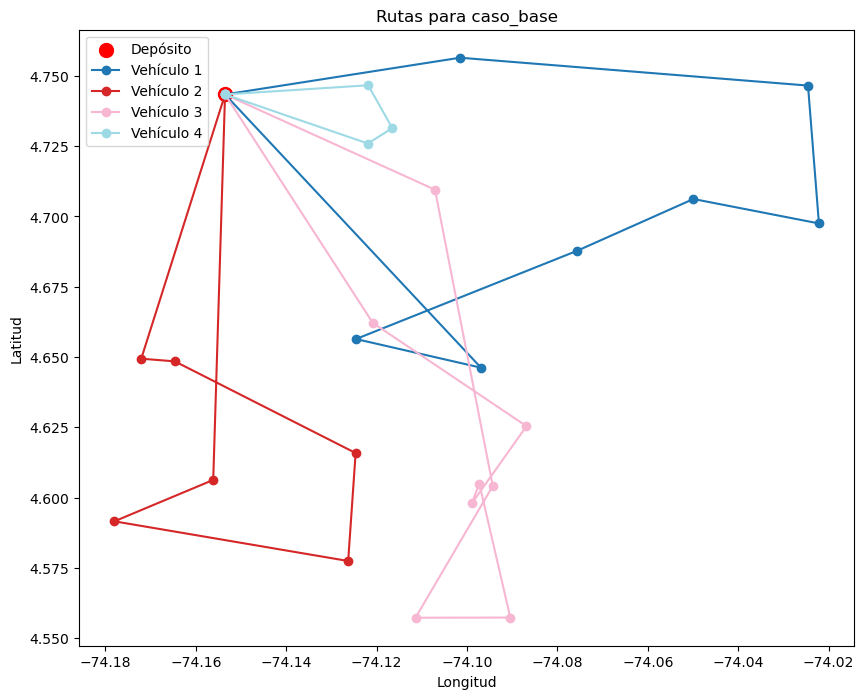

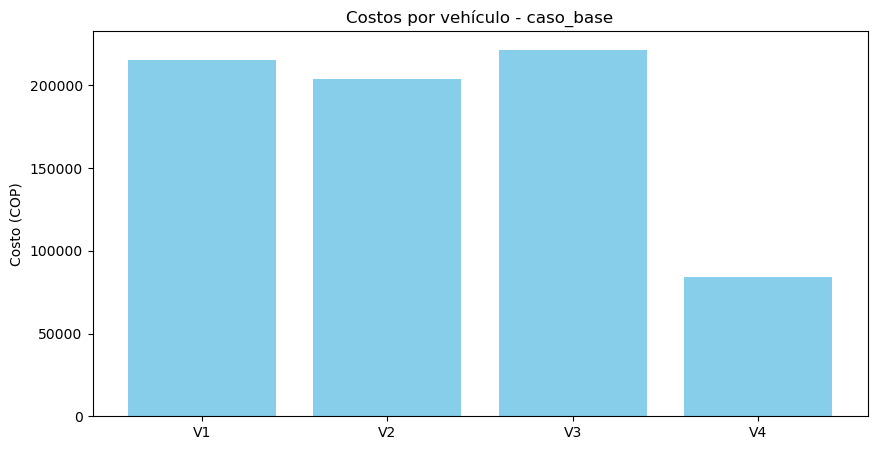

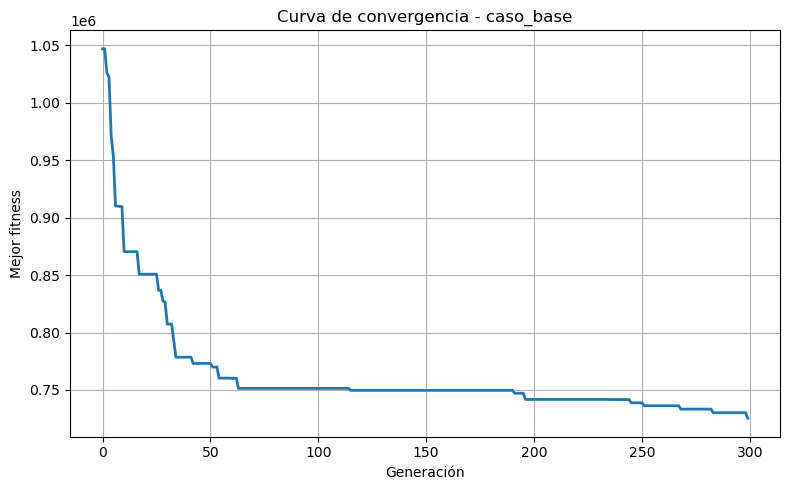


 Solving caso_2...
Precomputing distances...
Distances computed.

Tiempo total: 6.82 s
Memoria inicial: 127.80 MB
Memoria final:   127.85 MB
Total Cost (fitness): 228,541.52

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_2.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [5, 3, 8, 7, 9, 2, 1, 4, 6]
  Distancia: 52.86 km | Tiempo: 2.33 h | Combustible: 28719 COP | Fijo: 50000 COP
  Costo total: 228,541.52 COP

Costo total de todas las rutas: 228,541.52 COP


C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\1635366052.py:490: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


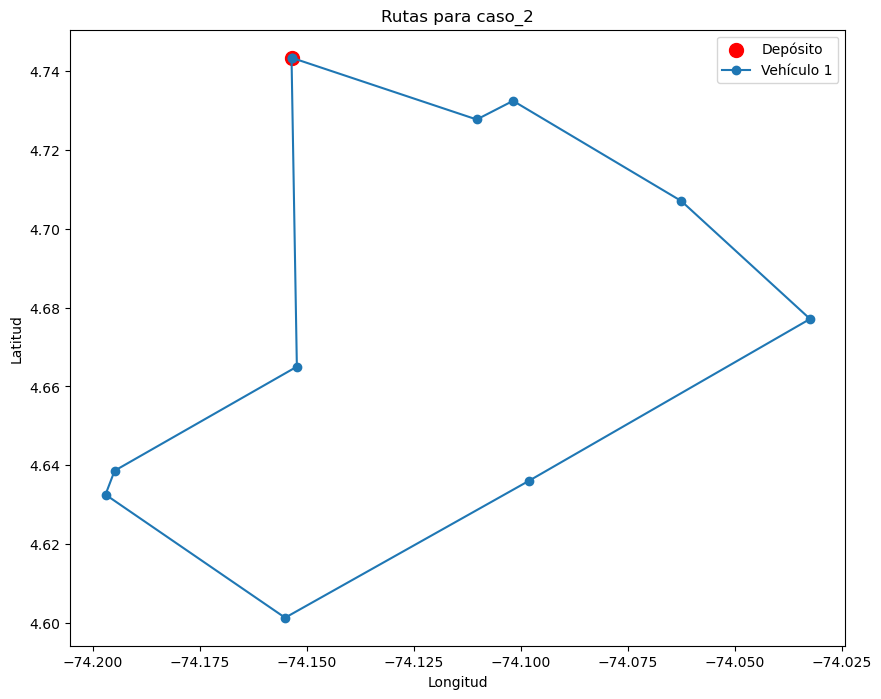

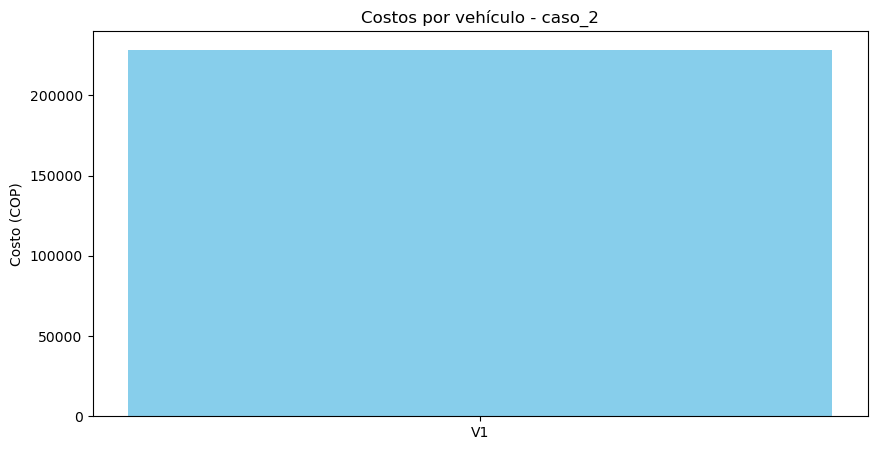

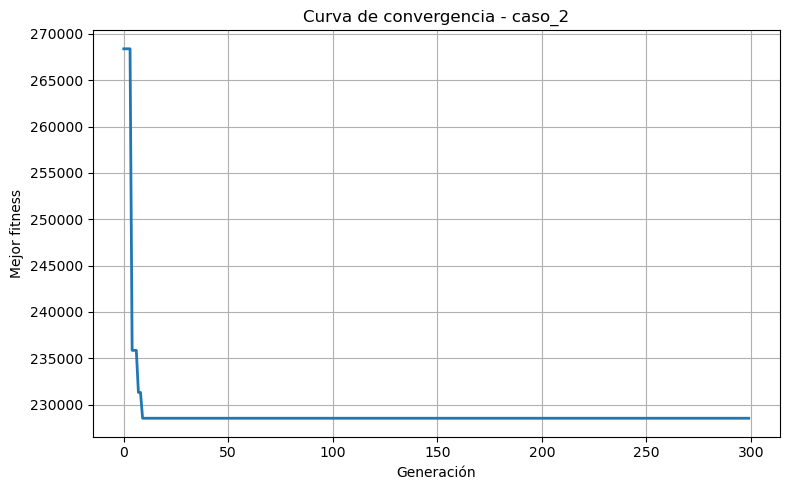


 Solving caso_3...
Precomputing distances...
Distances computed.

Tiempo total: 54.61 s
Memoria inicial: 130.95 MB
Memoria final:   125.80 MB
Total Cost (fitness): 4,401,514.06

CSV guardado en: resultados/metaheuristica\verificacion_metaheuristica_GA_caso_3.csv

--- COSTOS POR VEHÍCULO ---

Vehículo 1 | Ruta: [12, 42]
  Distancia: 47.42 km | Tiempo: 2.09 h | Combustible: 25768 COP | Fijo: 50000 COP
  Costo total: 210,193.66 COP

Vehículo 2 | Ruta: [82, 78, 69, 15, 21, 59, 57, 35]
  Distancia: 85.00 km | Tiempo: 3.74 h | Combustible: 46183 COP | Fijo: 50000 COP
  Costo total: 337,115.97 COP

Vehículo 3 | Ruta: [52, 18, 68, 11, 20, 73, 83, 76, 84, 61, 79]
  Distancia: 155.07 km | Tiempo: 6.83 h | Combustible: 84254 COP | Fijo: 50000 COP
  Costo total: 573,796.55 COP

Vehículo 4 | Ruta: [88, 89, 60, 87, 47, 50, 40]
  Distancia: 89.58 km | Tiempo: 3.94 h | Combustible: 48674 COP | Fijo: 50000 COP
  Costo total: 352,603.61 COP

Vehículo 5 | Ruta: [28, 75, 72, 56, 58, 32]
  Distancia: 79.8

C:\Users\mauri\AppData\Local\Temp\ipykernel_10912\1635366052.py:490: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(best_sol))


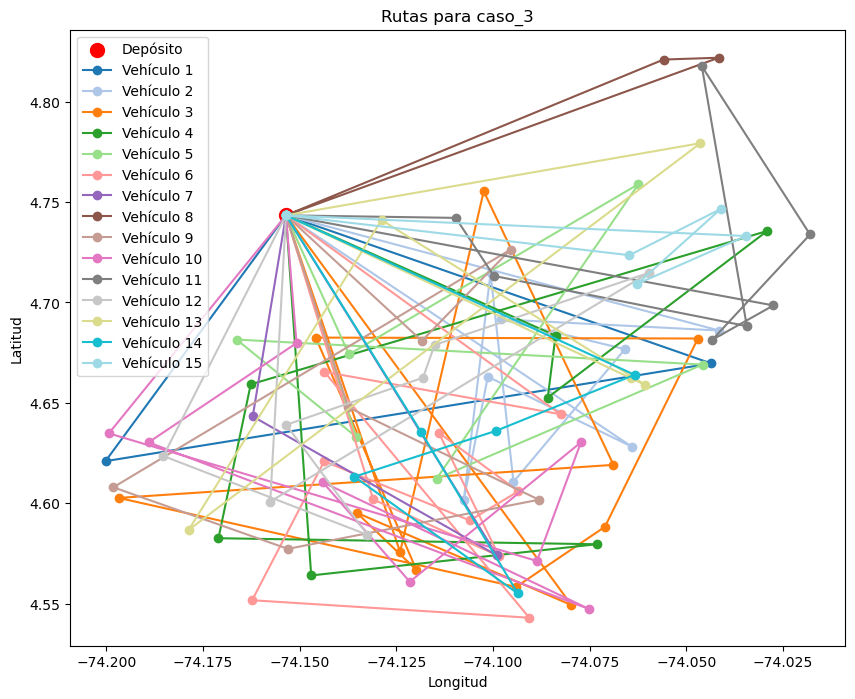

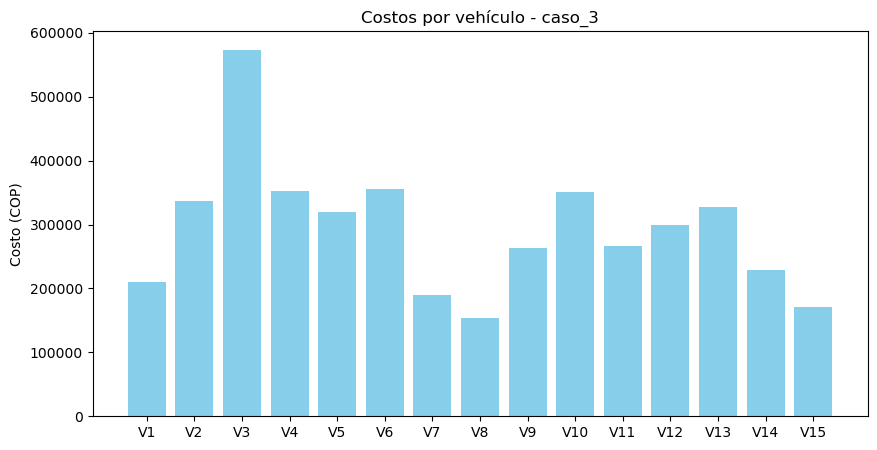

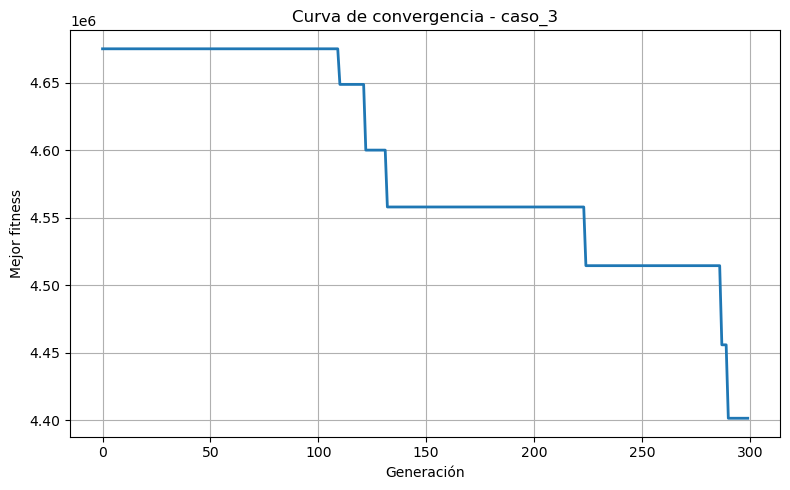

In [10]:
import pandas as pd
import numpy as np
import random
import math
import os
from copy import deepcopy
import time
import psutil
import matplotlib.pyplot as plt

# --- constantes varias ---
# Velocidad promedio que se usó para convertir distancias a tiempos.
# Esto realmente deberia venir de los datos pero bueno, lo dejamos fijo.
SPEED_KMH = 22.72

# radio de la tierra para usar en haversine
R_EARTH_KM = 6371.0


# ============================================================
# Funciones auxiliares varias (distancias, carga de datos, etc)
# ============================================================

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Distancia haversine simple. Esto lo copié hace tiempo y siempre toca revisar qe este bien
    pero en general funciona ok para distancias entre puntos geográficos.
    """
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    return R_EARTH_KM * c


def load_data(folder_path):
    """
    Carga los csv del caso. 
    A veces uno se confunde con los nombres, pero en este proyecto sí estaban bien.
    """
    clients_df = pd.read_csv(os.path.join(folder_path, 'clients.csv'))
    depots_df = pd.read_csv(os.path.join(folder_path, 'depots.csv'))
    depot = depots_df.iloc[0]   # asumimos solo un deposito por caso

    vehicles_df = pd.read_csv(os.path.join(folder_path, 'vehicles.csv'))
    return clients_df, depot, vehicles_df


# ============================================================
# Implementacion del Algoritmo Genético para CVRP
# ============================================================

class GeneticAlgorithmCVRP:

    def __init__(self, clients_df, depot, vehicles_df, params,
                 population_size=100, generations=500, mutation_rate=0.2,
                 crossover_rate=0.8, elitism_rate=0.1, tournament_size=5):

        # Guardamos los dataframes y parametros en general
        # (esto se vuelve desordenado rapido si uno no tiene cuidado)
        self.clients_df = clients_df
        self.depot = depot
        self.vehicles_df = vehicles_df.sort_values(by='Capacity', ascending=False).reset_index(drop=True)
        self.params = params
        
        # Clientes y demanda
        self.clients = clients_df['ClientID'].tolist()
        self.demands = dict(zip(clients_df['ClientID'], clients_df['Demand']))
        self.coords = dict(zip(clients_df['ClientID'], zip(clients_df['Latitude'], clients_df['Longitude'])))
        
        # Info del deposito
        self.depot_coords = (depot['Latitude'], depot['Longitude'])
        self.depot_id = depot["DepotID"]

        # flota y capacidades
        self.fleet_ids = vehicles_df["VehicleID"].tolist()
        self.fleet_capacities = vehicles_df["Capacity"].tolist()
        self.num_vehicles = len(self.fleet_capacities)

        # parametros del GA
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size

        # población y fitness
        self.population = []
        self.best_solution = None
        self.best_fitness = float("inf")

        # curva de convergencia (aquí meteremos cada mejor fitness por generación)
        self.convergence_curve = []   # NUEVO

        # matriz de distancias precalculada para no matar el performance
        self.dist_matrix = {}
        self._precompute_distances()


    def _precompute_distances(self):
        """
        Precalcula la matriz de distancias deposito-cliente y cliente-cliente 
        para evitar recalcular haversine siempre. Esto acelera MUCHISIMO.
        """
        print("Precomputing distances...")
        for cid in self.clients:
            c_lat, c_lon = self.coords[cid]
            d = haversine_distance(self.depot_coords[0], self.depot_coords[1], c_lat, c_lon)
            self.dist_matrix[(0, cid)] = d
            self.dist_matrix[(cid, 0)] = d

        # cliente-cliente
        for i in range(len(self.clients)):
            for j in range(i+1, len(self.clients)):
                c1, c2 = self.clients[i], self.clients[j]
                d = haversine_distance(self.coords[c1][0], self.coords[c1][1],
                                       self.coords[c2][0], self.coords[c2][1])
                self.dist_matrix[(c1, c2)] = d
                self.dist_matrix[(c2, c1)] = d
        
        print("Distances computed.")


    def get_distance(self, a, b):
        """
        Devuelve la distancia almacenada. 
        Si no existe, retorna 0 pero en teoría nunca deberia pasar salvo error.
        """
        if a == b: 
            return 0.0
        return self.dist_matrix.get((a, b), 0.0)


    # ----------------------------------------------------------
    # Inicializacion del GA
    # ----------------------------------------------------------

    def initialize_population(self):
        """
        Inicializa población aleatoria. 
        Esta parte se puede mejorar, pero por ahora se deja así.
        """
        self.population = []
        for _ in range(self.population_size):
            self.population.append(self._create_random_solution())


    def _create_random_solution(self):
        """
        Simplemente mezclamos clientes y los repartimos entre rutas.
        Esto no es muy "inteligente" pero sirve para arancar el GA.
        """
        shuffled = self.clients.copy()
        random.shuffle(shuffled)

        # se asigna un número aleatorio de vehículos usados (entre 1 y max)
        k = random.randint(1, self.num_vehicles)
        routes = [[] for _ in range(k)]

        # asignación round-robin
        for i, c in enumerate(shuffled):
            routes[i % k].append(c)

        return routes


    # ----------------------------------------------------------
    # Evaluación (fitness)
    # ----------------------------------------------------------

    def evaluate_fitness(self, solution):
        """
        Calcula el fitness. Aqui se nota que se mezclan varias cosas:
        penalización por capacidad, costos de distancia, combustible, tiempo, etc.
        """
        route_demands = [(sum(self.demands[c] for c in r), r) for r in solution]
        route_demands.sort(reverse=True)  # rutas con más demanda primero para asignarlas a vehículos grandes

        # penalización si tenemos más rutas que vehículos. 
        if len(solution) > self.num_vehicles:
            return 1e12  # valor absurdo para descartar

        capacity_penalty = 0.0
        total_dist = 0.0

        # por cada ruta se verifica capacidad y distancias
        for i, (demand, route) in enumerate(route_demands):
            cap = self.fleet_capacities[i]

            if demand > cap:
                capacity_penalty += (demand - cap) * 1e6

            if not route:
                continue

            # depósito → primer cliente
            total_dist += self.get_distance(0, route[0])

            # cliente → cliente
            for j in range(len(route)-1):
                total_dist += self.get_distance(route[j], route[j+1])

            # último cliente → depósito
            total_dist += self.get_distance(route[-1], 0)

        # costos del problema
        c_dist = self.params.get("C_dist", 0)
        c_time = self.params.get("C_time", 0)
        c_fixed = self.params.get("C_fixed", 0)
        fuel_price = self.params.get("fuel_price", 0)
        fuel_eff = self.params.get("fuel_efficiency_typical", 1)

        cost_dist = total_dist * c_dist
        cost_time = (total_dist / SPEED_KMH) * c_time
        cost_fuel = total_dist * (fuel_price / fuel_eff)
        cost_fixed = len(solution) * c_fixed

        return cost_dist + cost_time + cost_fuel + cost_fixed + capacity_penalty


    # ----------------------------------------------------------
    # Operadores GA
    # ----------------------------------------------------------

    def select_parents(self):
        """
        Seleccion por torneo. Escoge el mejor entre un conjunto pequeño
        de candidatos aleatorios.
        """
        def tournament():
            participants = random.sample(self.population, self.tournament_size)
            return min(participants, key=lambda x: self.evaluate_fitness(x))

        return tournament(), tournament()


    def crossover(self, p1, p2):
        """
        Operador OX, pero adaptado porque aqui tenemos varias rutas, no una sola.
        Convertimos cada solución a giant-tour y luego separamos.
        """

        # giant tour 1
        gt1 = [c for r in p1 for c in r]
        gt2 = [c for r in p2 for c in r]

        size = len(gt1)
        a, b = sorted(random.sample(range(size), 2))

        def ox(A, B):
            child = [None]*size
            # copiamos segmento A[a:b]
            child[a:b+1] = A[a:b+1]
            # llenamos resto con orden de B
            pos = (b+1) % size
            idx = (b+1) % size
            while None in child:
                if B[idx] not in child:
                    child[pos] = B[idx]
                    pos = (pos+1) % size
                idx = (idx+1) % size
            return child

        c1 = self._split_giant_tour(ox(gt1, gt2))
        c2 = self._split_giant_tour(ox(gt2, gt1))
        return c1, c2


    def _split_giant_tour(self, tour):
        """
        este metodo trata de reconstruir rutas a partir del giant tour
        asignando clientes a vehículos mientras tenga capacidad.
        """
        routes = []
        caps = self.fleet_capacities.copy()
        random.shuffle(caps)
        idx = 0

        for cap in caps:
            load = 0
            route = []
            # mientras no se supere capacidad
            while idx < len(tour) and load + self.demands[tour[idx]] <= cap:
                route.append(tour[idx])
                load += self.demands[tour[idx]]
                idx += 1

            if route:
                routes.append(route)

        # si sobran clientes meterlos al final (puede ser suboptimal)
        if idx < len(tour):
            routes[-1].extend(tour[idx:])

        return routes


    def mutate(self, sol):
        """
        Mutación simple: swap o move.
        """
        if random.random() >= self.mutation_rate:
            return sol

        if not sol:
            return sol

        t = random.choice(["swap", "move"])

        if t == "swap":
            r1 = random.randint(0, len(sol)-1)
            r2 = random.randint(0, len(sol)-1)
            if sol[r1] and sol[r2]:
                i = random.randint(0, len(sol[r1])-1)
                j = random.randint(0, len(sol[r2])-1)
                sol[r1][i], sol[r2][j] = sol[r2][j], sol[r1][i]

        else:  # move
            r1 = random.randint(0, len(sol)-1)
            r2 = random.randint(0, len(sol)-1)
            if sol[r1] and r1 != r2:
                i = random.randint(0, len(sol[r1])-1)
                elem = sol[r1].pop(i)
                j = random.randint(0, len(sol[r2]))
                sol[r2].insert(j, elem)

                if not sol[r1]:
                    sol.pop(r1)

        return sol


    # ----------------------------------------------------------
    # Evolución y solución final
    # ----------------------------------------------------------

    def evolve(self):
        """
        Hace una iteracion del GA: evaluar, seleccionar, cruzar, mutar, etc.
        Notese qe esto calcula fitness muchas veces. Se podria optimizar.
        """
        scored = [(s, self.evaluate_fitness(s)) for s in self.population]
        scored.sort(key=lambda x: x[1])

        # actualizar mejor global
        if scored[0][1] < self.best_fitness:
            self.best_fitness = scored[0][1]
            self.best_solution = deepcopy(scored[0][0])

        # elitismo
        elite = max(1, int(self.population_size * self.elitism_rate))
        new_pop = [deepcopy(s[0]) for s in scored[:elite]]

        # rellenar nueva población
        while len(new_pop) < self.population_size:
            p1, p2 = self.select_parents()
            c1, c2 = self.crossover(p1, p2)
            new_pop.append(self.mutate(c1))
            if len(new_pop) < self.population_size:
                new_pop.append(self.mutate(c2))

        self.population = new_pop

        # guardamos fitness para curva de convergencia
        self.convergence_curve.append(self.best_fitness)  # NUEVO


    def plot_convergence(self, case_name):
        """
        Grafica la evolucion del mejor fitness. 
        Esta es la tipica curva de convergencia qe se usa en metaheuristicas.
        """
        if not self.convergence_curve:
            print("No convergence data to plot.")
            return

        plt.figure(figsize=(8, 5))
        plt.plot(self.convergence_curve, linewidth=2)
        plt.xlabel("Generación")
        plt.ylabel("Mejor fitness")
        plt.title(f"Curva de convergencia - {case_name}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


    def solve(self):
        """
        Corre todo el GA. La parte más simple de todo esto.
        """
        self.initialize_population()
        for _ in range(self.generations):
            self.evolve()
        return self.best_solution, self.best_fitness


# ============================================================
# Post procesamiento: costos, csv, graficos
# ============================================================

def compute_route_stats(route, ga):
    """
    Calcula estadísticas por ruta (dist, tiempo, fuel, demanda). 
    Esto se usa luego para imprimir y guardar.
    """
    if not route:
        return 0,0,0,0

    d_total = ga.get_distance(0, route[0])
    for i in range(len(route)-1):
        d_total += ga.get_distance(route[i], route[i+1])
    d_total += ga.get_distance(route[-1], 0)

    demand_total = sum(ga.demands[c] for c in route)
    time_total = d_total / SPEED_KMH
    fuel_price = ga.params["fuel_price"]
    fuel_efficiency = ga.params["fuel_efficiency_typical"]
    fuel_cost = d_total * (fuel_price / fuel_efficiency)

    return d_total, time_total, fuel_cost, demand_total


def save_metaheuristic_csv(case_name, ga, best_sol):
    """
    Guarda un archivo csv para verificacion. Esto es útil para revisar rutas despues.
    """
    out_dir = "resultados/metaheuristica"
    os.makedirs(out_dir, exist_ok=True)

    filename = f"verificacion_metaheuristica_GA_{case_name}.csv"
    filepath = os.path.join(out_dir, filename)

    rows = []
    for i, route in enumerate(best_sol):
        v_id = ga.fleet_ids[i]
        d_id = ga.depot_id
        d, t, fuel, load = compute_route_stats(route, ga)

        rows.append([
            v_id,
            d_id,
            load,
            "-".join([str(d_id)] + [str(c) for c in route] + [str(d_id)]),
            len(route),
            "-".join(str(ga.demands[c]) for c in route),
            round(d, 6),
            round(t, 6),
            round(fuel, 6)
        ])

    df = pd.DataFrame(rows, columns=[
        "VehicleId","DepotId","InitialLoad","RouteSequence",
        "ClientsServed","DemandsSatisfied","TotalDistance","TotalTime","FuelCost"
    ])

    df.to_csv(filepath, index=False)
    print(f"\nCSV guardado en: {filepath}")
    return filepath


def print_costs_by_vehicle(ga, best_sol):
    """
    Imprime costos por cada vehículo como en el reporte final.
    """
    total_cost = 0
    print("\n--- COSTOS POR VEHÍCULO ---")

    for i, route in enumerate(best_sol):
        d, t, fuel, load = compute_route_stats(route, ga)
        cost = d*ga.params['C_dist'] + t*ga.params['C_time'] + fuel + ga.params['C_fixed']
        total_cost += cost

        print(f"\nVehículo {i+1} | Ruta: {route}")
        print(f"  Distancia: {d:.2f} km | Tiempo: {t:.2f} h | Combustible: {fuel:.0f} COP | Fijo: {ga.params['C_fixed']} COP")
        print(f"  Costo total: {cost:,.2f} COP")

    print(f"\nCosto total de todas las rutas: {total_cost:,.2f} COP")


def plot_routes(ga, best_sol, case_name):
    """
    Grafica las rutas sobre un plano lat/lon. 
    No es bonito, pero sirve para ver la idea.
    """
    plt.figure(figsize=(10,8))
    colors = plt.cm.get_cmap('tab20', len(best_sol))

    # deposito
    plt.scatter(ga.depot_coords[1], ga.depot_coords[0], c='red', s=100, label='Depósito')

    for i, route in enumerate(best_sol):
        lats = [ga.depot_coords[0]] + [ga.coords[c][0] for c in route] + [ga.depot_coords[0]]
        lons = [ga.depot_coords[1]] + [ga.coords[c][1] for c in route] + [ga.depot_coords[1]]
        plt.plot(lons, lats, color=colors(i), marker='o', label=f'Vehículo {i+1}')

    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.title(f"Rutas para {case_name}")
    plt.legend()
    plt.show()


def plot_costs_by_vehicle(ga, best_sol, case_name):
    """
    Grafica barras de costos por vehículo
    """
    costs = []
    for route in best_sol:
        d, t, fuel, load = compute_route_stats(route, ga)
        cost = d*ga.params['C_dist'] + t*ga.params['C_time'] + fuel + ga.params['C_fixed']
        costs.append(cost)

    plt.figure(figsize=(10,5))
    plt.bar([f"V{i+1}" for i in range(len(best_sol))], costs, color='skyblue')
    plt.ylabel("Costo (COP)")
    plt.title(f"Costos por vehículo - {case_name}")
    plt.show()


# ============================================================
# MAIN - Ejecuta GA para los tres casos
# ============================================================

if __name__ == "__main__":

    params_default = {
        "fuel_price": 16300,
        "fuel_efficiency_typical": 30,
        "C_fixed": 50000,
        "C_dist": 2500,
        "C_time": 7600
    }

    base_path = r"cvrp_content-main"
    cases = ["caso_base", "caso_2", "caso_3"]

    for case in cases:
        print("\n======================")
        print(f" Solving {case}...")
        print("======================")

        case_path = os.path.join(base_path, case)
        clients_df, depot, vehicles_df = load_data(case_path)

        process = psutil.Process(os.getpid())
        mem_start = process.memory_info().rss / 1024**2
        t_start = time.time()

        ga = GeneticAlgorithmCVRP(
            clients_df, depot, vehicles_df, params_default,
            population_size=150,
            generations=300,
            mutation_rate=0.3
        )

        best_sol, best_fit = ga.solve()

        t_end = time.time()
        mem_end = process.memory_info().rss / 1024**2

        print(f"\nTiempo total: {t_end - t_start:.2f} s")
        print(f"Memoria inicial: {mem_start:.2f} MB")
        print(f"Memoria final:   {mem_end:.2f} MB")
        print(f"Total Cost (fitness): {best_fit:,.2f}")

        # Guardar CSV
        save_metaheuristic_csv(case, ga, best_sol)

        # Imprimir costos
        print_costs_by_vehicle(ga, best_sol)

        # graficar rutas y costos
        plot_routes(ga, best_sol, case)
        plot_costs_by_vehicle(ga, best_sol, case)

        # nueva grafica que muestra convergencia del GA
        ga.plot_convergence(case)   # NUEVO

## Discusión:
Al analizar conjuntamente los resultados y las gráficas de evolución contenidas en el archivo proporcionado, se observa un comportamiento consistente del algoritmo genético frente a la complejidad de cada caso. En **caso_base**, la curva de convergencia desciende de manera relativamente rápida durante las primeras generaciones, estabilizándose pronto en un óptimo local razonable; esto concuerda con las rutas compactas y el costo total moderado (~725 mil COP), indicando que la estructura del problema permite mejoras tempranas sin grandes oscilaciones. En **caso_2**, la gráfica muestra una convergencia aún más rápida y estable: prácticamente desde el inicio la curva cae hacia un valor bajo y se mantiene sin fluctuaciones relevantes, lo cual es coherente con el hecho de que el algoritmo termina usando un único vehículo, pues la instancia es pequeña, más homogénea espacialmente y no requiere exploraciones extensas para encontrar una buena solución. En contraste, **caso_3** exhibe una curva de evolución distinta: hay descensos abruptos en ciertos tramos, acompañados por periodos prolongados de estancamiento; estos patrones indican que el espacio de soluciones es mucho más irregular, con múltiples óptimos locales. La complejidad del caso obliga al algoritmo a explorar más profundamente, y aunque mejora progresivamente, nunca alcanza la estabilidad limpia de los casos anteriores. Esto coincide con las gráficas de rutas, donde se aprecia una dispersión extrema de clientes y la necesidad de utilizar 15 vehículos, lo cual naturalmente deriva en un costo total elevado (~4.4 millones COP). Las gráficas de convergencia evidencian que la calidad y velocidad de mejora del algoritmo dependen directamente del tamaño, la dispersión espacial y las restricciones de cada instancia: cuanto más complejo es el caso, más accidentada es la evolución y mayor el costo final.
